### Import Libraries

In [1]:
#import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.arima_model import ARIMA

### Import Data

In [2]:
water_data=pd.read_csv('water.csv',index_col=0,parse_dates=True)
water_data

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


### Understanding the Data

In [3]:
water_data.shape

(79, 1)

In [4]:
water_data.isna().sum()

Water    0
dtype: int64

In [5]:
water_data.dtypes

Water    int64
dtype: object

### Visualization

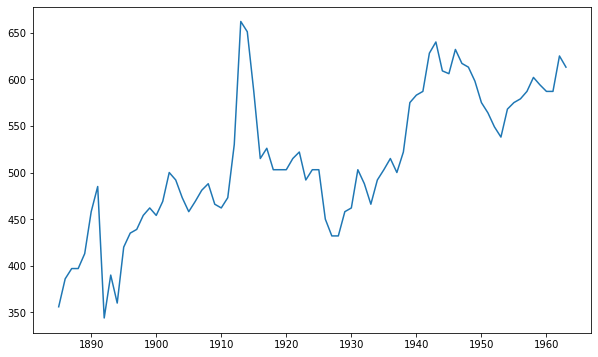

In [6]:
plt.figure(figsize=(10,6))
plt.plot(water_data)
plt.show()

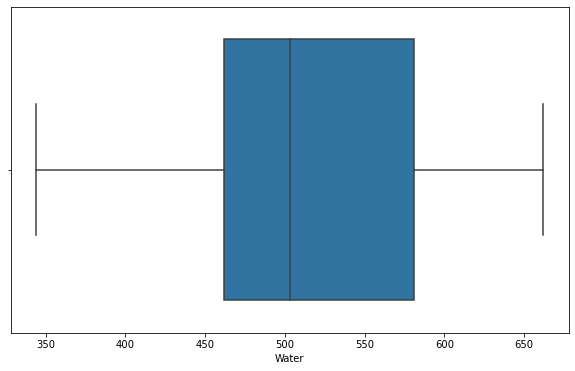

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(water_data['Water'])
plt.show()

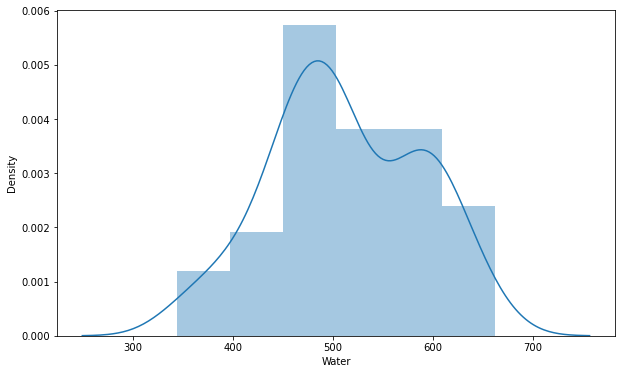

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(water_data['Water'])
plt.show()

### Data Preparation - Persistent / Base Model

In [9]:
split_point=len(water_data)-10

training_data=water_data[0:split_point]
testing_data=water_data[split_point:]

print(f'Dataset {len(training_data)}, Validation {len(testing_data)}')

Dataset 69, Validation 10


In [10]:
training_data.to_csv('dataset.csv',header=False)
testing_data.to_csv('validation.csv',header=False)
train_input=pd.read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)

X = train_input.values
X = X.astype('float32')
train_size = int(len(X)*0.5)
train,test = X[0:train_size],X[train_size:]

In [11]:
predictions=list()
history=[x for x in train]
for i in range(0,len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print(f"Observed {obs}, predicted {yhat}")
rmse=np.sqrt(mse(test,predictions))
print("Root Mean Squared Error : %.3f" % rmse)

Observed 503.0, predicted 503.0
Observed 503.0, predicted 503.0
Observed 515.0, predicted 503.0
Observed 522.0, predicted 515.0
Observed 492.0, predicted 522.0
Observed 503.0, predicted 492.0
Observed 503.0, predicted 503.0
Observed 450.0, predicted 503.0
Observed 432.0, predicted 450.0
Observed 432.0, predicted 432.0
Observed 458.0, predicted 432.0
Observed 462.0, predicted 458.0
Observed 503.0, predicted 462.0
Observed 488.0, predicted 503.0
Observed 466.0, predicted 488.0
Observed 492.0, predicted 466.0
Observed 503.0, predicted 492.0
Observed 515.0, predicted 503.0
Observed 500.0, predicted 515.0
Observed 522.0, predicted 500.0
Observed 575.0, predicted 522.0
Observed 583.0, predicted 575.0
Observed 587.0, predicted 583.0
Observed 628.0, predicted 587.0
Observed 640.0, predicted 628.0
Observed 609.0, predicted 640.0
Observed 606.0, predicted 609.0
Observed 632.0, predicted 606.0
Observed 617.0, predicted 632.0
Observed 613.0, predicted 617.0
Observed 598.0, predicted 613.0
Observed

### ARIMA Model - Hyper Parameter

#### Evaluate Arima Model

In [12]:
#evaluate arima model for a given arima order (p,q,d) and evaluate RMSE
def evaluate_arima_model(X,arima_order):
#preparing training dataset
    X=X.astype('float32')
    train_size = int(len(X) * 0.5)
    train,test = X[0:train_size], X[train_size:]
    history = [i for i in train]
#make predictions
    predictions = list()
    for t in range(0,len(test)):
        model = ARIMA(endog=history,order=arima_order).fit(disp=0)
        yhat = model.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
#Calculate RMSE
    RMSE = np.sqrt(mse(test, predictions))
    return RMSE

In [13]:
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X=train.values

### Grid search / Evaluate Arima Order (p, q, d)

In [14]:
def evaluate_order(dataset, p_values, q_values, d_values):
    dataset = dataset.astype('float32')
    best_score, best_order = float('inf'), None
    for p in p_values:
        for q in q_values:
            for d in d_values:
                try:
                    order = (p,q,d)
                    rmse = evaluate_arima_model(train,order)
                    print(f"RMSE is {rmse} and Order is {order}")
                    if rmse < best_score:
                        best_score,best_order = rmse,order
                except:
                    continue
    print(f"best score is {best_score} and best order is {best_order}")

In [15]:
p_values = range(0,4)
q_values = range(0,4)
d_values = range(0,4)
import warnings
warnings.filterwarnings('ignore')
evaluate_order(train,p_values,q_values,d_values)

RMSE is 76.75491713273671 and Order is (0, 0, 0)
RMSE is 47.345937882743314 and Order is (0, 0, 1)
RMSE is 36.048397307684276 and Order is (0, 0, 2)
RMSE is 32.587271504233286 and Order is (0, 0, 3)
RMSE is 22.311363342341636 and Order is (0, 1, 0)
RMSE is 22.25807743307064 and Order is (0, 1, 1)
RMSE is 28.43039363261121 and Order is (0, 1, 2)
RMSE is 30.0543242818172 and Order is (0, 1, 3)
RMSE is 29.334732391917857 and Order is (0, 2, 0)
RMSE is 23.071921387211034 and Order is (0, 2, 1)
RMSE is 22.954260410628596 and Order is (0, 2, 2)
RMSE is 23.3745596528375 and Order is (0, 2, 3)
RMSE is 23.957804470376274 and Order is (1, 0, 0)
RMSE is 23.99808081068842 and Order is (1, 0, 1)
RMSE is 25.411646722706667 and Order is (1, 0, 2)
RMSE is 31.454189840305514 and Order is (1, 0, 3)
RMSE is 22.269859725644316 and Order is (1, 1, 0)
RMSE is 27.786455960068235 and Order is (1, 2, 0)
RMSE is 22.97940549325985 and Order is (1, 2, 1)
RMSE is 24.13091053761146 and Order is (2, 0, 0)
RMSE is 24

### Build Model Based on Optimized values

In [16]:
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X=train.values
X=X.astype('float32')

In [17]:
model=ARIMA(X,order=(2,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
forecast

array([541.91813222, 546.07387203, 548.68825128, 551.21037526,
       553.88878788, 556.58364509, 559.26296585, 561.93989528,
       564.61833601, 567.29709172])

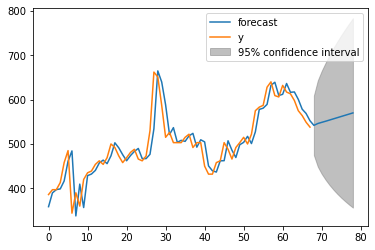

In [18]:
model_fit.plot_predict(1,79)
plt.show()

In [19]:
val = pd.read_csv('validation.csv',header=None)
val[1]

0    568
1    575
2    579
3    587
4    602
5    594
6    587
7    587
8    625
9    613
Name: 1, dtype: int64

In [20]:
rmse_optimzed=np.sqrt(mse(val[1],forecast))
rmse_optimzed

38.16203543589212

### Combine train and test data to build final model

In [21]:
water_full_data=pd.read_csv('water.csv',header=0,index_col=0,parse_dates=True)
X=water_full_data['Water']
X=X.astype('float32')
X

Year
1885-01-01    356.0
1886-01-01    386.0
1887-01-01    397.0
1888-01-01    397.0
1889-01-01    413.0
              ...  
1959-01-01    594.0
1960-01-01    587.0
1961-01-01    587.0
1962-01-01    625.0
1963-01-01    613.0
Name: Water, Length: 79, dtype: float32

In [22]:
final_model = ARIMA(X,(2,1,0))
final_model_fit = final_model.fit()

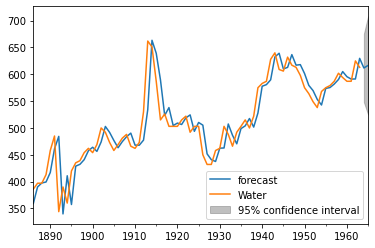

In [23]:
forecast=final_model_fit.forecast(steps=10)[0]
final_model_fit.plot_predict(1,80)
plt.show()

In [24]:
forecast

array([611.80226106, 616.60052463, 620.37844494, 623.44640745,
       626.60600614, 629.84870402, 633.08381072, 636.30929433,
       639.53531635, 642.76244149])

### End !!!